Random seed 2021 has been set.
Size val_loader 3
Size train_loader 10


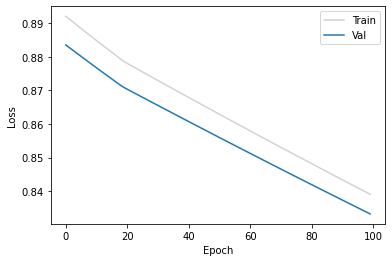

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt

from experiment import Experiment
from Network import Net_1, Net_2, Training




# REPRODUCIBILITY
def set_seed(seed=None, seed_torch=True):

    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    if seed_torch:
        torch.manual_seed(seed)

    print(f'Random seed {seed} has been set.')

SEED = 2021
set_seed(seed=SEED)
DEVICE = torch.device("cpu")
G_SEED = torch.Generator()
G_SEED.manual_seed(SEED)


#HELPER FUNCTION
def print_params(model):
    for name, param in model.named_parameters():
        if param.requires_grad:
            print(name, param.data)







#######________MAIN________#######



experiment = Experiment(width=10,g_seed = G_SEED)
model = Net_1(input_dimension = 5, output_dimension = 1)

Size_total_dataset = experiment.width * experiment.width
Batch_size = 8
n_epochs = 100
learning_rate = 0.0001



train_loader,val_loader = experiment.Create_Dataset(SIZE = Size_total_dataset,BATCH_SIZE = Batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
criterion = nn.BCELoss()
train = Training(model,optimizer,criterion)


print("Size val_loader",len(val_loader))
print("Size train_loader",len(train_loader))

losses = []
val_losses = []
for epoch in range(n_epochs):
    loss = 0
    val_loss = 0 
    for x_batch, y_batch in train_loader:

        loss += train.train_network(x_batch, y_batch).detach().numpy()
    losses.append(loss/len(train_loader))
        
    with torch.no_grad():
        for x_val, y_val in val_loader:

            model.eval()

            yhat = model(x_val)
            val_loss += criterion( yhat,y_val.unsqueeze(1))
        val_losses.append(val_loss.item()/len(val_loader))





l_epoch = [i for i in range(len(losses))]
l_epoch_val = [i for i in range(len(val_losses))]

plt.figure()
plt.plot(l_epoch,losses, '-', color='lightgrey', label='Train')
plt.plot(l_epoch_val,val_losses, '-', label='Val')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()



